# Korpora (Open Subtitles)

[GOOGLE](https://google.com)

[NAVER](https://naver.com "링크 설명(title)을 작성하세요.")

[상대적 참조](../users/login)

[Dribbble][Dribbble Link]

[GitHub][1]

문서 안에서 [참조 링크]를 그대로 사용할 수도 있습니다.
다음과 같이 문서 내 일반 URL이나 꺾쇠 괄호(`< >`, Angle Brackets)안의 URL은 자동으로 링크를 사용합니다.

구글 홈페이지: https://google.com
네이버 홈페이지: <https://naver.com>

[Dribbble Link]: https://dribbble.com
[1]: https://github.com
[참조 링크]: https://naver.com "네이버로 이동합니다!"

![대체텍스트](이미지주소)
![대체텍스트](이미지주소 "설명")
![대체텍스트][참조]

[참조]: 이미지주소
[참조]: 이미지주소 "설명"

![대체 텍스트(Alternative Text)](https://picsum.photos/1000/400 "링크 설명(Title)")
![이미지입니다!][Image]

[Image]: https://picsum.photos/500/300 "이미지입니다!"

[![HEROPY.DEV](https://picsum.photos/1000/400)](https://heropy.dev/)

| 값 | 의미 | 기본값 |
|---|:---:|---:|
| `static` | 유형(기준) 없음 / 배치 불가능 | `static` |
| `relative` | 요소 자신을 기준으로 배치 |  |
| `absolute` | 위치 상 부모(조상)요소를 기준으로 배치 |  |
| `fixed` | 브라우저 창을 기준으로 배치 |  |
| `sticky` | 스크롤 영역 기준으로 배치 |  |

값 | 의미 | 기본값
---|:---:|---:
`static` | 유형(기준) 없음 / 배치 불가능 | `static`
`relative` | 요소 자신을 기준으로 배치 |
`absolute` | 위치 상 부모_(조상)요소를 기준으로 배치 |
`fixed` | 브라우저 창을 기준으로 배치 |
`sticky` | 스크롤 영역 기준으로 배치 |

| 값 | 의미 |
|---|---|
| 버티컬바 출력 | \| |
| 인라인 코드 강조 | `\|` |

> 인용문 - 남의 말이나 글에서 직접 또는 간접으로 따온 문장.
> _(네이버 국어 사전)_

BREAK!

> 인용문을 작성하세요!
>> 중첩된 인용문(nested blockquote)을 만들 수 있습니다.
>>> 중중첩 인용문 1
>>> 중중첩 인용문 2
>>> 중중첩 인용문 3

마크다운에서 <u>밑줄</u>은 지원하지 않습니다.

<img width="150" src="http://gstatic.com/webp/gallery/4.jpg" alt="Prunus" title="마크다운은 이미지의 크기를 지정할 수 없으므로, 크기 지정을 위해서는 <img> 태그를 사용해야 합니다.">

![Prunus](http://www.gstatic.com/webp/gallery/4.jpg)

---

***

___

-- 시작 --

<!-- 안녕하세요. -->
[//]: # (안녕하세요.)
[//]: # "안녕하세요."
[//]: # '안녕하세요.'

-- 종료 --

Fetching OpenSubtitles dataset...
[Korpora] Corpus `open_subtitles` is already installed at C:\Users\AMD_DL_SEQ\Korpora\open_subtitles\en-ko.tmx.gz
[Korpora] Corpus `open_subtitles` is already installed at C:\Users\AMD_DL_SEQ\Korpora\open_subtitles\en-ko.tmx
Parsing TMX file from: C:\Users\AMD_DL_SEQ\Korpora\open_subtitles\en-ko.tmx
Successfully loaded and cleaned 5000 samples.
Data Samples (Top 5):

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   english  5000 non-null   object
 1   korean   5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB
Sentence Length Statistics:


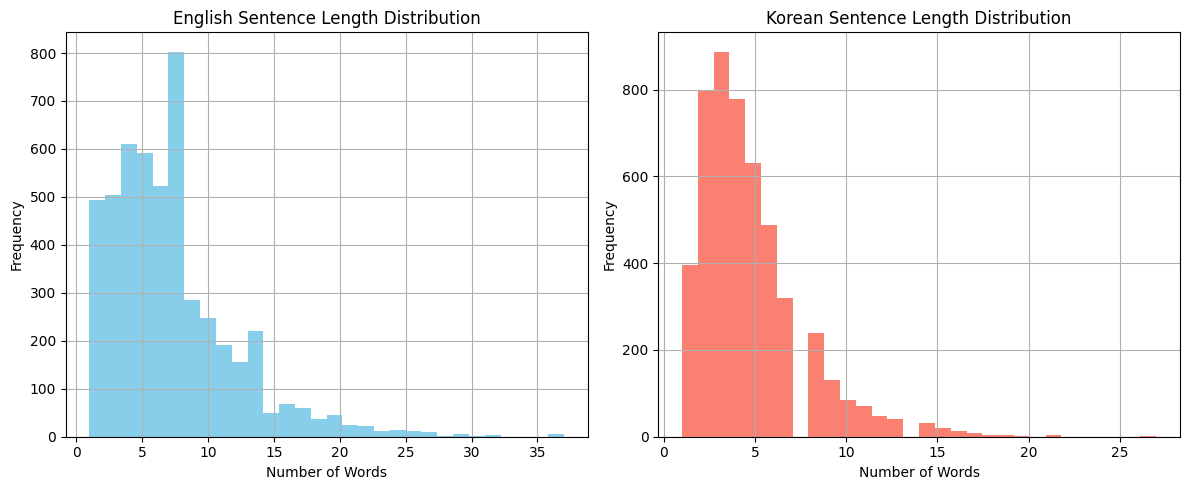

Most Common English Words (Top 20):
[('the', 1640), ('you', 1006), ('to', 906), ('i', 859), ('a', 682), ('of', 602), ('and', 520), ('is', 404), ('in', 384), ('for', 305), ('it', 272), ('that', 268), ('have', 265), ('be', 262), ('my', 242), ('this', 231), ('we', 224), ('with', 220), ('your', 215), ('on', 202)]

Most Common Korean Words (Top 20):
[('안', 167), ('수', 152), ('이', 137), ('내가', 124), ('그', 124), ('내', 102), ('좀', 102), ('거야', 101), ('한', 89), ('난', 82), ('있는', 80), ('♪', 75), ('더', 73), ('왜', 71), ('할', 66), ('것', 64), ('하지만', 64), ('게', 61), ('모든', 61), ('잘', 59)]


In [1]:
# %% [markdown]
# # Transformer 학습 데이터셋 분석
# 
# 이 노트북은 PySide6 애플리케이션에서 사용한 OpenSubtitles 데이터셋을 불러와, `pandas`를 이용해 데이터의 특성을 분석하는 과정을 담고 있습니다.
# 
# **필요 라이브러리:**
# - Korpora
# - pandas
# - matplotlib
# 
# `pip install Korpora pandas matplotlib` 명령어로 설치할 수 있습니다.

# %%
# 필요한 라이브러리 임포트
import os
import xml.etree.ElementTree as ET
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from Korpora import Korpora

# %% [markdown]
# ## 1. 데이터셋 로드 및 파싱
# 
# 애플리케이션의 `TrainingWorker`와 동일한 로직으로 OpenSubtitles 데이터를 불러오고 파싱합니다.
# - **Korpora.fetch**: 데이터셋을 로컬에 다운로드합니다. (최초 1회)
# - **ET.parse**: 다운로드된 `en-ko.tmx` 파일을 파싱하여 영어-한국어 문장 쌍을 추출합니다.
# - **데이터 정제**: 문장 앞의 불필요한 `-` 기호와 공백을 제거합니다.

# %%
# 데이터 로드 및 정제 함수 정의
def load_and_clean_dataset(num_samples=5000):
    """
    Korpora를 통해 OpenSubtitles 데이터셋을 다운로드하고,
    TMX 파일을 파싱하여 정제된 문장 쌍 리스트를 반환합니다.
    """
    print("Fetching OpenSubtitles dataset...")
    Korpora.fetch("open_subtitles")
    
    korpora_path = os.path.join(os.path.expanduser('~'), 'Korpora', 'open_subtitles')
    tmx_path = os.path.join(korpora_path, 'en-ko.tmx')
    
    print(f"Parsing TMX file from: {tmx_path}")
    tree = ET.parse(tmx_path)
    root = tree.getroot()
    
    data_pairs = []
    
    for tu in root.iter('tu'):
        if len(data_pairs) >= num_samples:
            break
        
        en_text, ko_text = None, None
        for tuv in tu.findall('tuv'):
            lang = tuv.get('{http://www.w3.org/XML/1998/namespace}lang')
            seg = tuv.find('seg')
            if seg is not None and seg.text:
                cleaned_text = re.sub(r'^\s*-\s*', '', seg.text).strip()
                if not cleaned_text:
                    continue
                
                if lang == 'en':
                    en_text = cleaned_text.lower()
                elif lang == 'ko':
                    ko_text = cleaned_text
        
        if en_text and ko_text:
            data_pairs.append((en_text, ko_text))
            
    print(f"Successfully loaded and cleaned {len(data_pairs)} samples.")
    return data_pairs

# 함수 실행하여 데이터 로드
TRAIN_DATA = load_and_clean_dataset(num_samples=5000)

# %% [markdown]
# ## 2. Pandas DataFrame으로 변환 및 기본 정보 확인
# 
# 파싱된 데이터를 `pandas` DataFrame으로 변환하여 테이블 형태로 쉽게 다룰 수 있도록 합니다.

# %%
# DataFrame 생성
df = pd.DataFrame(TRAIN_DATA, columns=['english', 'korean'])

# 데이터 샘플 확인 (상위 5개)
print("Data Samples (Top 5):")
df.head()

# %%
# 기본 정보 확인 (데이터 개수, 결측치 등)
print("\nDataFrame Info:")
df.info()


# %% [markdown]
# ## 3. 데이터 특성 분석
# 
# 문장의 길이 분포, 단어 빈도 등 데이터의 구체적인 특성을 분석합니다. 이는 모델 학습 전략을 세우는 데 도움이 됩니다.

# %%
# 각 문장의 단어 수 계산 (공백 기준)
df['en_len'] = df['english'].str.split().str.len()
df['ko_len'] = df['korean'].str.split().str.len()

# 문장 길이 통계 확인
print("Sentence Length Statistics:")
df[['en_len', 'ko_len']].describe()

# %%
# 문장 길이 분포 시각화 (히스토그램)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df['en_len'].hist(bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('English Sentence Length Distribution')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')

df['ko_len'].hist(bins=30, ax=axes[1], color='salmon')
axes[1].set_title('Korean Sentence Length Distribution')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# %% [markdown]
# ### 단어 빈도 분석
# 
# 어떤 단어가 데이터셋에 자주 등장하는지 확인합니다. 이는 모델이 특정 단어만 반복해서 출력하는 현상의 원인을 파악하는 데 유용합니다.

# %%
# 영어 단어 빈도 계산
english_words = [word for sent in df['english'] for word in sent.split()]
english_word_counts = Counter(english_words)

print("Most Common English Words (Top 20):")
print(english_word_counts.most_common(20))

# %%
# 한국어 단어 빈도 계산
korean_words = [word for sent in df['korean'] for word in sent.split()]
korean_word_counts = Counter(korean_words)

print("\nMost Common Korean Words (Top 20):")
print(korean_word_counts.most_common(20))


In [2]:
df.head(11)

,english,korean,en_len,ko_len
0,what is wrong?,잘못됐나?,3,1
1,get away from her!,그녀한테서 떨어져요! - 무슨 일인가?,4,5
2,what happened?,떨어지시라고요!,2,1
3,get away from her!,구급차 불러요,4,2
4,call an ambulance.,이 여잔 여길 나가면 안 돼,3,6
5,she can't leave here.,심장박동이 멈췄어요,4,2
6,her heart stopped beating.,여길 떠나면 안 돼,4,4
7,she can't leave. - what happened?,무슨 일이지?,6,2
8,we are going to the hospital.,병원으로 가야겠습니다,6,2
9,i said you can't!,안 된다고 했어!,4,3
